# Estructura de proyecto de Machine Learning: DATOS

El objetivo de este conjunto de notebooks es desarrollar un proyecto de ML con un dataset clásico entre la comunidad del aprendizaje automático, esta estructura servirá como template para gran parte de los algoritmos y datasets que nos encontremos más adelante en la materia. 

Comenzamos con la exploración y acondicionamiento de datos.

In [1]:
### Imports Python
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

### Imports data
import os
import tarfile
import urllib.request
import pandas as pd


## Datos

Los datos que vamos a analizar corresponden a los precios de casas en ciudades del estado de California en EEUU. Cada entrada de nuestros datos tendrá un valor de precio que la caracteriza y otros _features_ que elegiremos para poder predecir ese valor utilizando algún algoritmo. 

### Descarga de datos

In [43]:
## Paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [44]:
### Funcs data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) ### urllib se encarga de descargar el archivo
    housing_tgz = tarfile.open(tgz_path) ### .tgz es un archivo comprimido, esta fuinción lo abre 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) ### Función magiaca que nos traduce un CSV a un objeto pandas, forma estandar de leer CSVS hoy.

### descargo y descompimo
#fetch_housing_data()

### Primer vistazo a los datos

In [45]:
housing = load_housing_data()
print("N Features: ",len(housing.columns))
housing.head()  ### Me devuelve los primeros 5 datos

N Features:  10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Tenemos 10 _Features_ por dato que pueden tomar diferentes tipos de valores.

Veamos qué tipo de datos son:

In [46]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [47]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


### Observaciones


Tenemos entonces 9 Features que son floats de 64bits y otro que es tipo object. La variable tipo object es categórica y toma 5 valores psoibles, descritos más arriba.

Otra información inportante que nos provee facilmente _Pandas_ es cuántos elementos "non-null" tenemos por Feature. Vemos que casi todos tienen 20640 datos completos, que es igual al tamaño del set, pero _total_bedrooms_ tiene algunos missing values o Nans. Trataremos con ellos en breve

# Separo Train y Test

Es fundamental hacer esta separación antes de trabajar sobre los features, ver cuáles importan y cuáles no. De esta manera podemos corraborar nuestras afirmaciones con un set de datos que no vimos

In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) ### Fijamos 20% para test y 42 es el random state para poder reproducir los resultados
housing = train_set.copy() ### Reasigno a Housing con el train set

La forma estandar de guardar objetos en python es con la librería _pickle_. Pandas ya tiene en su interior una implemtación para guardar y cargar pickles, por lo que haremos uso de ella.

In [49]:
test_set.to_pickle("datasets/housing_test.pkl")

# Visualización

In [10]:
# Download the California image
#images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
#os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
#urllib.request.urlretrieve(url, filename)

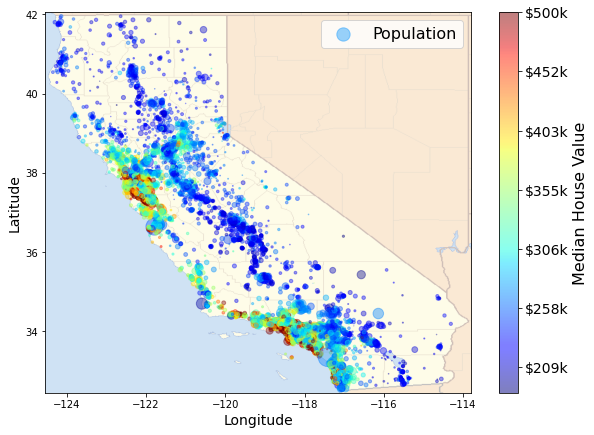

In [11]:
import matplotlib.image as mpimg

california_img=mpimg.imread(filename) ### Leo la imagen del archivo

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4) #### Mismo plot que antes.


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet")) ### Superpongo las dos figuras
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


### hago la barra de color
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11) 
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

### Algunos graficos para tener intuición
Miraemos la distribución de valores que toma cada Feature de forma independiente para empezar a conocer cómo se distribuyen.

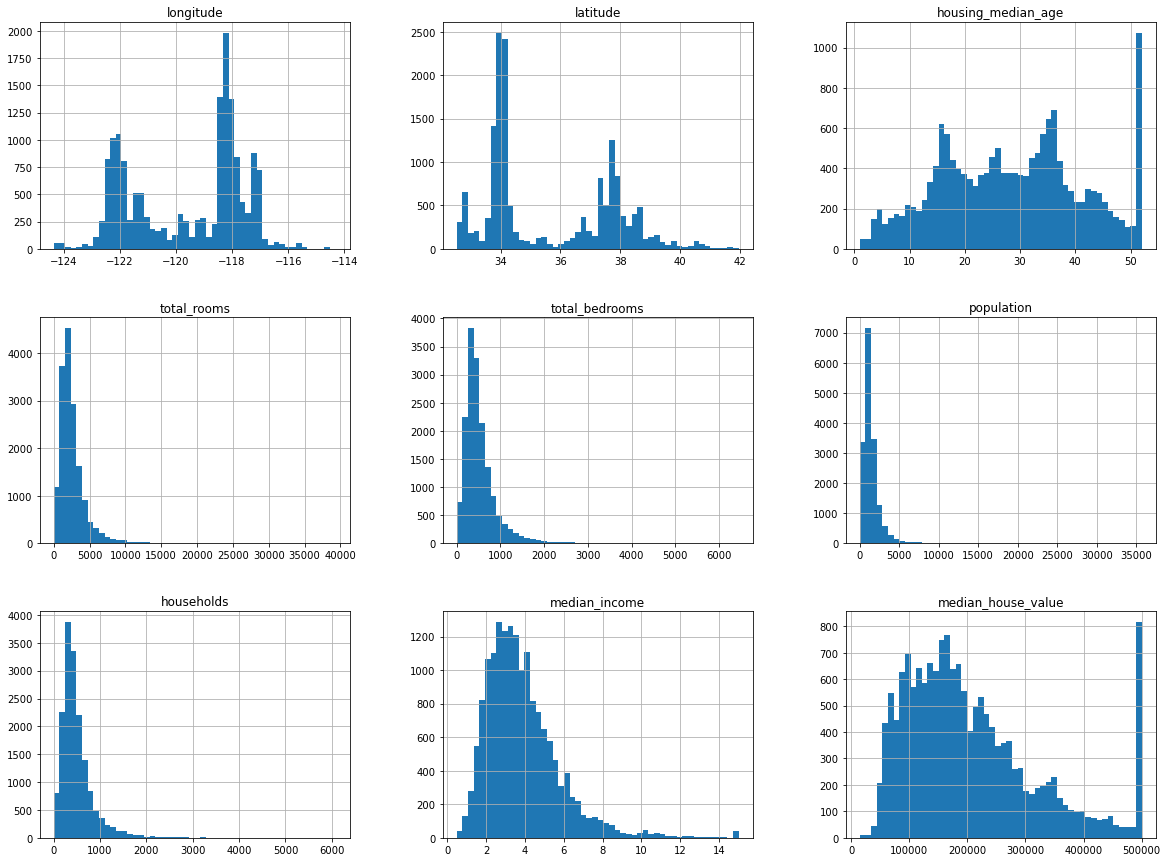

In [12]:
housing.hist(bins=50, figsize=(20,15));


### Obs
Aquí estamos mirando lo que se conoce como _distribución marginal_ $P(X)$ de cada feature $X$ . Esto nos da información sobre esas variables, pero carece de utilidad si queremos ver cómo se vinculan entre sí. Para eso necesitamos la _distribución conjunta_ de estos, $P(X,Y)$. Ésta nos ayuda a entender como son las relaciones entre $X$ e $Y$, y por ejemplo ver qué distribución toma $X$ cuando fijo a $Y$ con un valor partícular $Y=y_{0}$, la cual se conoce como _distribución condicional_.

Lamentablemente el ojo nos permite ver gráficos de hasta 2, o a veces 3 dimensiones, entonces sólo vamos a poder tener un panorama general de la distribución conjunta de todos los _features_ viendo las distribuciones conjuntas de pares de variables

## Correlaciones

Veamos las correlaciones que hay con los precios de las casas

In [13]:
### Calculo correlaciones con métodos de objeto pandas

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687393
total_rooms           0.132733
housing_median_age    0.108758
households            0.063866
total_bedrooms        0.047020
population           -0.027357
longitude            -0.045095
latitude             -0.145205
Name: median_house_value, dtype: float64


**Las que son más grandes en valor absoluto son:**
* median_income, total_rooms, latitude y housing_median_age

### Plots

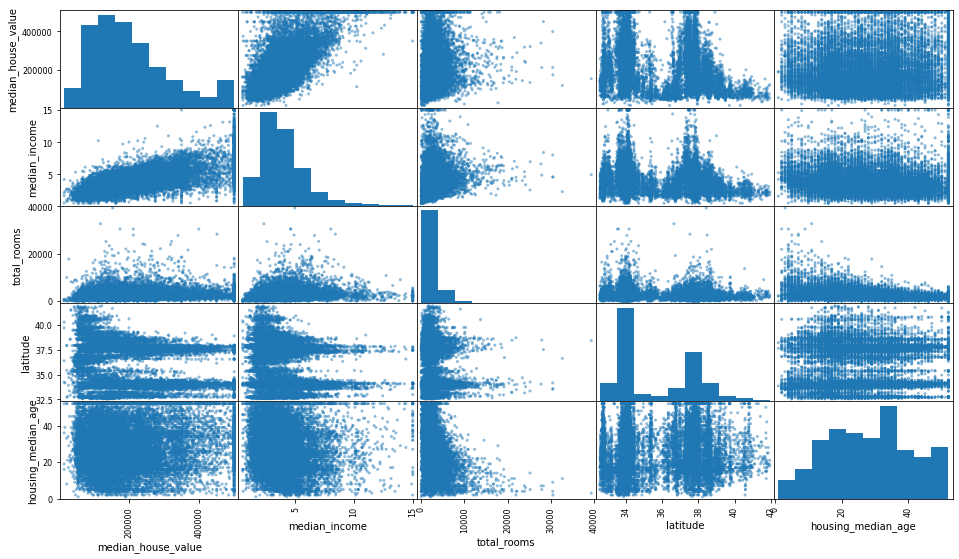

In [14]:
feat_corr = ["median_house_value","median_income", "total_rooms", "latitude", "housing_median_age"]
pd.plotting.scatter_matrix(housing[feat_corr], figsize=(16, 9));

### Conlusiones

**El feature que más correlación exhibe con el precio es el "median_income", lo cual no parece extraño**

## Un paso más: Combinación de atributos

### Cocientes
Usando tanto la intuición o bien el ojo en los gráficos podemos combinar atributos para generar nuevos que nos sean linealmente dependientes de los anterior que pueden obtener quizás más poder explicativo. En este ejemplo una posibilidad derivada de la intuición es estudiar la variable cuartos por casa, habitaciones por ambiente y "population" por casa. 

In [15]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Distancia a la costa

Otra variable razonable que sale de mirar el mapa es la distancia a la costa, parece ser que hay correlación negativa entre el precio de las casas con su distancia al mar.

Para eso tomamos como aproximación de la costa una recta que pasa por $(-124.55,\,38)$ y $(-118.5,\,32.5)$. Utilizando la latitud y longitud podemos calcular la distancia a esa recta y ver cómo se correlaciona con el precio.

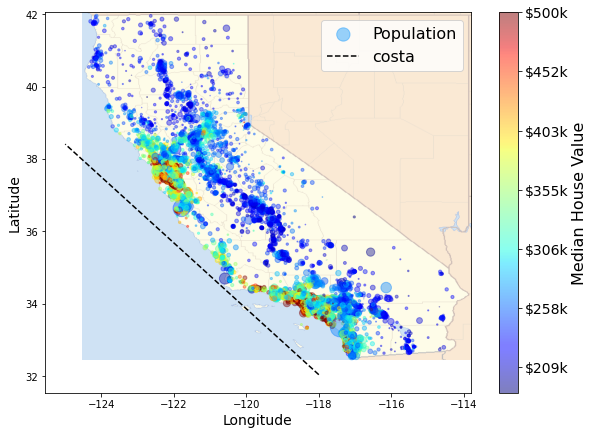

In [16]:
import matplotlib.image as mpimg
california_img=mpimg.imread(filename) ### Leo la imagen del archivo

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4) #### Mismo plot que antes.


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet")) ### Superpongo las dos figuras
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


### hago la barra de color
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11) 
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)


### Hago la recta

x = np.linspace(-118,-125,100)
p0 = (-124.55,38)
p1 = (-118.5, 32.5)
m = (p1[1]-p0[1])/(p1[0]-p0[0])
b = p0[1]-m*p0[0]
plt.plot(x,m*x+b,linestyle = "--",color = "k",label = "costa")
plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

Usando que:
$$
\operatorname{distance}(ax+by+c=0, (x_0, y_0)) = \frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}
$$

In [17]:

housing["coast_distance"] =  abs(m*housing["longitude"] - housing["latitude"] + b)/np.sqrt(m**2+1)


### Nuevas Correlaciones

In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687393
rooms_per_household         0.147215
total_rooms                 0.132733
housing_median_age          0.108758
households                  0.063866
total_bedrooms              0.047020
population                 -0.027357
population_per_household   -0.032384
longitude                  -0.045095
latitude                   -0.145205
bedrooms_per_room          -0.255872
coast_distance             -0.475462
Name: median_house_value, dtype: float64

**GENIAL**

Parece que nuestra intuición sirvió para construir variables con más relación al precio. Es bastante fuerte notar que las variables longitud y latitud por sí solas tienen correlaciones muy bajas, pero la distancia a la costa, una funcion no lineal de estas coordenadas, está muy correlacionada.

# Features Categóricos

Para tratar los features categóricos tenemos dos opciones principales

* Ordenar sus valores según algún criterio y asignarles números naturales.
* Aplicarlees un OneHotEncorder, este bicho nos devuelve un vector de dimensión igual al número de categorías posibles. El cual contiene ceros en todos los lugares, salvo en la categoría de nuestro dato 

### Asignación de números "OrdinalEncoder"

In [19]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]  ### los dobles corchetes hacen que se cree un df nuevo con la lista de "keys" que pongamos como argumento
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [22]:
print(housing_cat_encoded[0],housing_cat_encoded[30])

[1.] [3.]


### OneHotEncoder

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Este proceso aumenta la dimensiónde los datos significativamente y prácticamente casi todos los valores son ceros. Es por ésto, que sklearn almacena el resultado del procedimiento en un array sparce que ocupa menos memoria. Para pasarlo a vector común hacemos:

In [24]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

# La angustia de los Nans

Es muy frecuente encontrarse con datos incompletos o mal procesados en ciertos atributos y en consecuencia  no les podemos aplicar un algoritmo de aprendizaje directamente. En esos casos tenemos tres opciones:

1) Sacamos los datos que tienen alguna columna, o varias, incompletas.
2) Sacamos la/s columna que no tiene todos los datos llenos.
3) Reemplazamos los valores faltantes con algún estadístico de la distribución marginal, Ej Mediana, Media, Moda.

Para ver lo que hace cada opción vamos a implementar cada idea sobre un subset de los datos que contiene los valores Null

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12346 to 17673
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16346 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16346 non-null  float64
 12  population_per_household  16512 non-null  float64
 13  coast_distance            16512 non-null  float64
dtypes:

In [34]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,coast_distance


In [35]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,coast_distance


### 1) Saco las filas

In [36]:
#sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows = housing.copy()

sample_incomplete_rows.dropna(subset=["total_bedrooms"]).info()    # opcion 1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12346 to 17673
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
 12  population_per_household  16512 non-null  float64
 13  coast_distance            16512 non-null  float64
dtypes:

No quedó ninguna fila del subset

### 2) Saco la columna

In [37]:
sample_incomplete_rows = housing.copy()

sample_incomplete_rows.drop(["total_bedrooms","bedrooms_per_room"], axis=1).head() # opción 2


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,coast_distance
12346,-116.52,33.82,21.0,10227.0,3623.0,1734.0,2.5212,145200.0,INLAND,5.897924,2.089389,2.308613
19326,-122.94,38.50,46.0,2280.0,807.0,366.0,2.6316,117000.0,<1H OCEAN,6.229508,2.204918,1.452973
16824,-122.49,37.63,31.0,3109.0,1472.0,618.0,5.1550,263900.0,NEAR OCEAN,5.030744,2.381877,1.111928
6869,-118.11,34.06,16.0,2416.0,1750.0,514.0,2.8229,163700.0,<1H OCEAN,4.700389,3.404669,1.416649
16677,-120.66,35.13,41.0,2666.0,940.0,507.0,1.9653,236100.0,<1H OCEAN,5.258383,1.854043,0.493069


Eliminé las columnas que me generaban el problema

### 3) Relleno de medias

In [38]:
median_totbed = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median_totbed, inplace=True)

median_bedroom = housing["bedrooms_per_room"].median()
sample_incomplete_rows["bedrooms_per_room"].fillna(median_bedroom, inplace=True)


In [39]:
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12346 to 17673
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
 12  population_per_household  16512 non-null  float64
 13  coast_distance            16512 non-null  float64
dtypes:

Ahora ningún dato tiene NaN y los que los tenían están reemplazados por la mediana de la distribución marginal.

In [40]:

housing["total_bedrooms"].fillna(median_totbed, inplace=True)
housing["bedrooms_per_room"].fillna(median_bedroom, inplace=True)


## Exporto y me voy


In [41]:
housing.to_pickle("datasets/housing_4train.pkl")

# CHAU!